<a href="https://colab.research.google.com/github/Confidentrf/AI/blob/Machine-Learning/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machines

```
# This is formatted as code
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# To generate our fabricated data set, we'll create two blobs of
# randomly distributed data at two corners of the graph...
centers = [(0.9, 0.05), (0.05, 0.94)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)

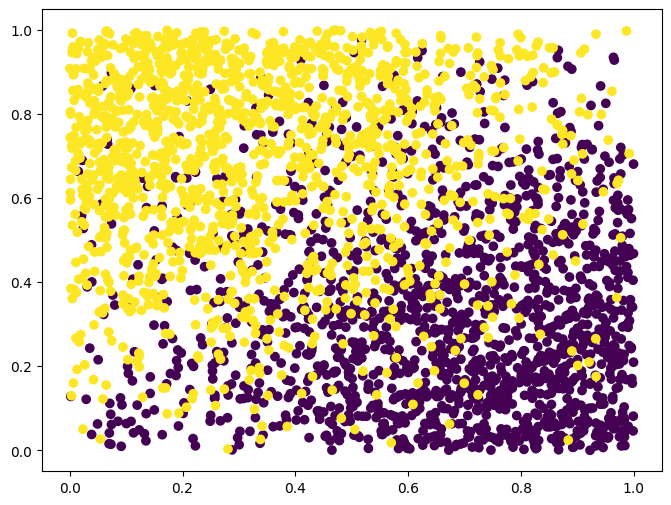

In [2]:
%matplotlib inline
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

In [4]:
from sklearn import svm, datasets
C = 1.0
svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)

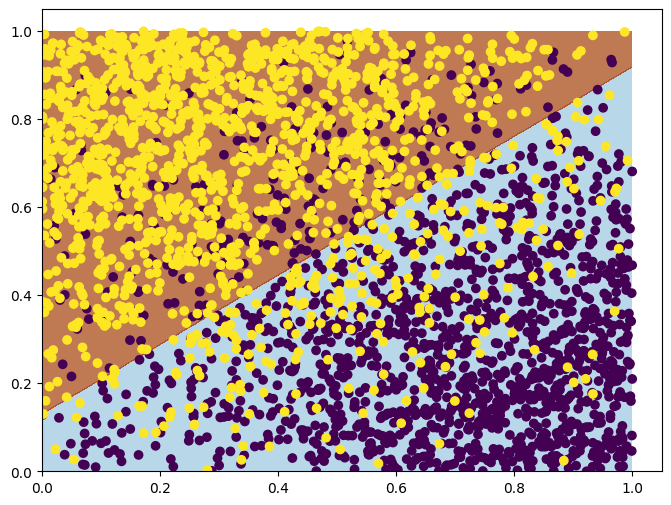

In [5]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                     np.arange(0, 1.0, 0.001))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(float))
    plt.show()

plotPredictions(svc)

In [6]:
print(svc.predict([[0.3, 0.3]]))

[0]


In [8]:
print(svc.predict([[0, 1]]))
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(svc, X, y, cv=5)
print (fold_scores)
print (np.mean(fold_scores))

[1]
[0.86721311 0.83934426 0.8407225  0.83087028 0.83415435]
0.8424609006971924


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(gamma=[0, 0.5, 1.0, 2.0, 3.0, 10.0, 100.0, 1000.0])
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=10)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'gamma': 0.5} with a score of 0.84


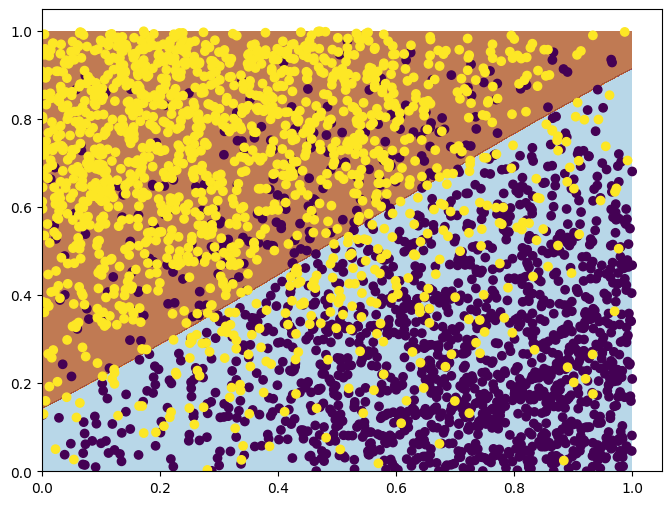

In [10]:
svc = svm.SVC(kernel='rbf', gamma=grid.best_params_['gamma']).fit(X, y)

plotPredictions(svc)

Hyper Perameter Tuning

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(C=[0.1, 0.5, 1.0, 2.0, 3.0, 10.0, 100.0, 1000.0])
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=10)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.5} with a score of 0.84


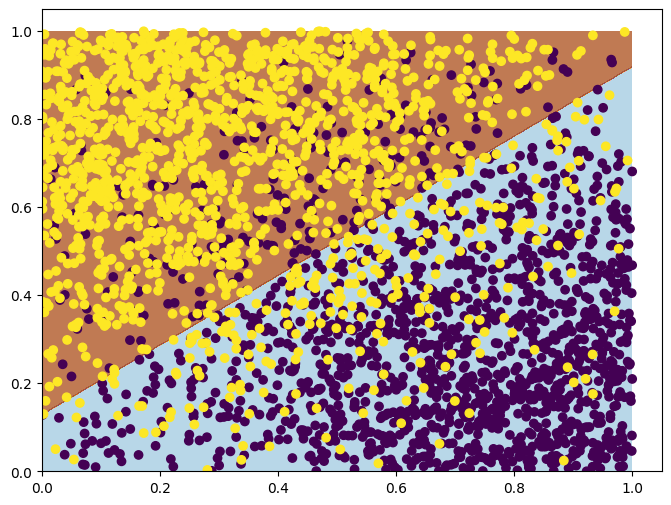

In [12]:
svc = svm.SVC(kernel='linear', C=grid.best_params_['C']).fit(X, y)

plotPredictions(svc)